In [1]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator

In [2]:
train = pd.read_csv('CROSS_0/Procesado_MatrizZ/Entrenamiento.csv', header=None).drop(72, axis=1) 
valid_sano = pd.read_csv('CROSS_0/Procesado_MatrizZ/Validar.csv', header=None).drop(72, axis=1) 
test_sano = pd.read_csv('CROSS_0/Procesado_MatrizZ/Testeo_Sanos.csv', header=None).drop(72, axis=1) 
test_dano_1 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo1.csv', header=None).drop(72, axis=1) 
test_dano_2 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo2.csv', header=None).drop(72, axis=1) 
test_dano_3 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo3.csv', header=None).drop(72, axis=1) 
test_dano_4 = pd.read_csv('CROSS_0/Procesado_MatrizZ/Fallo4.csv', header=None).drop(72, axis=1) 
train

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-1.812158,3.217156,0.350761,-1.369288,0.515122,0.600575,-1.364183,2.503679,2.320076,-1.350177,...,1.998478,1.116960,-0.111975,1.390354,-0.333762,-0.359525,-0.454836,0.528516,0.287115,1.728255
1,-2.235936,2.694053,1.223120,-1.472601,0.361710,-0.263067,-1.357454,2.207045,1.856622,-1.581570,...,2.992950,0.311024,-0.694390,0.541644,-0.826887,0.313106,1.220485,-0.033371,0.286125,-0.033173
2,-1.927922,3.105845,1.267345,-1.425841,0.707145,0.043724,-1.386444,1.630982,3.556536,-1.390921,...,5.783092,1.323061,-1.241683,0.710307,0.686552,-0.731920,-0.482734,0.745747,0.013047,0.513666
3,-2.074381,2.675180,0.429512,-1.365598,0.820610,0.820906,-1.318250,2.473601,2.300059,-1.467371,...,0.564852,0.591336,-0.327275,1.983985,-0.855859,0.246809,1.067995,0.394339,0.170156,2.612055
4,-2.150803,2.679648,1.830032,-1.503132,0.465324,0.110258,-1.386456,1.928185,0.656150,-1.502077,...,3.865622,0.806259,-0.412767,0.788796,-0.221982,-0.173597,-1.232362,0.356119,0.131493,1.099789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1.652583,-0.765475,-0.801022,1.357820,1.608083,0.987817,1.344963,-0.774646,-0.805808,1.218211,...,-0.552139,-1.001254,-3.320241,-1.183035,-1.073223,-1.663611,-0.834583,-1.589555,2.349536,-0.817108
1116,0.419643,-1.730902,-0.696396,1.725098,0.970891,-0.634984,2.464345,-2.428896,-1.413345,2.418140,...,-1.418829,-0.960579,-1.748600,-1.258399,-1.225981,-1.560263,0.224482,-1.504018,2.290971,-0.337308
1117,0.813098,-1.401045,-0.194313,1.132609,1.345473,0.290521,1.563662,-1.839324,-0.859258,1.394701,...,0.049424,-1.007624,-2.625040,-1.332387,-0.943559,-1.699485,-1.198310,-1.601045,2.720870,-0.206770
1118,-0.053002,-1.624499,-1.110135,1.079513,0.993546,0.168881,1.582735,-1.640238,-0.086821,1.535140,...,-1.221488,-1.152824,-1.346330,-1.080023,-1.511341,-2.078759,-0.332620,-1.672237,2.524915,-1.237206


In [3]:
column_names = []

sensors = [f"S{i}" for i in range(1, 9)]  # S1 a S8
axes = ["X", "Y", "Z"]
features = ["DF", "EP", "K"]

for sensor in sensors:
    for axis in axes:
        for feature in features:
            column_names.append(f"{sensor}_{axis}_{feature}")
print(column_names)
print(f"Total columnas: {len(column_names)}")  # Debería dar 72

['S1_X_DF', 'S1_X_EP', 'S1_X_K', 'S1_Y_DF', 'S1_Y_EP', 'S1_Y_K', 'S1_Z_DF', 'S1_Z_EP', 'S1_Z_K', 'S2_X_DF', 'S2_X_EP', 'S2_X_K', 'S2_Y_DF', 'S2_Y_EP', 'S2_Y_K', 'S2_Z_DF', 'S2_Z_EP', 'S2_Z_K', 'S3_X_DF', 'S3_X_EP', 'S3_X_K', 'S3_Y_DF', 'S3_Y_EP', 'S3_Y_K', 'S3_Z_DF', 'S3_Z_EP', 'S3_Z_K', 'S4_X_DF', 'S4_X_EP', 'S4_X_K', 'S4_Y_DF', 'S4_Y_EP', 'S4_Y_K', 'S4_Z_DF', 'S4_Z_EP', 'S4_Z_K', 'S5_X_DF', 'S5_X_EP', 'S5_X_K', 'S5_Y_DF', 'S5_Y_EP', 'S5_Y_K', 'S5_Z_DF', 'S5_Z_EP', 'S5_Z_K', 'S6_X_DF', 'S6_X_EP', 'S6_X_K', 'S6_Y_DF', 'S6_Y_EP', 'S6_Y_K', 'S6_Z_DF', 'S6_Z_EP', 'S6_Z_K', 'S7_X_DF', 'S7_X_EP', 'S7_X_K', 'S7_Y_DF', 'S7_Y_EP', 'S7_Y_K', 'S7_Z_DF', 'S7_Z_EP', 'S7_Z_K', 'S8_X_DF', 'S8_X_EP', 'S8_X_K', 'S8_Y_DF', 'S8_Y_EP', 'S8_Y_K', 'S8_Z_DF', 'S8_Z_EP', 'S8_Z_K']
Total columnas: 72


In [4]:
###Prueba arquitectura
# Inicializar H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.10+11-LTS-240, mixed mode, sharing)
  Starting server from C:\Users\User\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\User\AppData\Local\Temp\tmpwfdasxgo
  JVM stdout: C:\Users\User\AppData\Local\Temp\tmpwfdasxgo\h2o_Abel_started_from_python.out
  JVM stderr: C:\Users\User\AppData\Local\Temp\tmpwfdasxgo\h2o_Abel_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Guayaquil
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 years and 27 days
H2O_cluster_name:,H2O_from_python_Abel_rxafet
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [5]:
data = h2o.import_file('CROSS_0/Procesado_MatrizZ/Entrenamiento.csv')
data=data.drop(72)
data_val=  h2o.import_file('CROSS_0\Procesado_MatrizZ\Validar.csv')
data_val=data_val.drop(72)
data_test_1=  h2o.import_file('CROSS_0\Procesado_MatrizZ\Fallo1.csv')
data_test_1=data_test_1.drop(72)
data_test_2=  h2o.import_file('CROSS_0\Procesado_MatrizZ\Fallo2.csv')
data_test_2=data_test_2.drop(72)
data_test_3=  h2o.import_file('CROSS_0\Procesado_MatrizZ\Fallo3.csv')
data_test_3=data_test_3.drop(72)
data_test_4=  h2o.import_file('CROSS_0\Procesado_MatrizZ\Fallo4.csv')
data_test_4=data_test_4.drop(72)
data_test_h=  h2o.import_file('CROSS_0\Procesado_MatrizZ\Testeo_Sanos.csv')
data_test_h=data_test_h.drop(72)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
model = H2OExtendedIsolationForestEstimator(ntrees=226, seed=31415926535,extension_level=71, sample_size=891)#, ignored_columns=columnas_ignoradas_2
model.train(training_frame=data)

extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%


,number_of_trees,size_of_subsample,extension_level,seed,number_of_trained_trees,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves,min_isolated_point,max_isolated_point,mean_isolated_point,min_not_isolated_point,max_not_isolated_point,mean_not_isolated_point,min_zero_splits,max_zero_splits,mean_zero_splits
,226,891,71,31415926535.0000000,226.0,9.0,9.0,9.0,29.0,205.0,107.56195,1.0,68.0,31.566372,823.0,890.0,859.43365,7.0,64.0,33.893806


In [11]:
predictions = model.predict(data)
anomaly_score = predictions["anomaly_score"]
anomaly_score.as_data_frame().to_numpy()

extendedisolationforest prediction progress: |

███████████████████████████████████| (done) 100%


array([[0.47815825],
       [0.46220523],
       [0.5058736 ],
       ...,
       [0.42324819],
       [0.42985565],
       [0.43699306]])

In [14]:
X = data
X_df = X.as_data_frame()
X_array = X_df.to_numpy()
print(X_df.shape[1])
print(X_array.shape[1])
X_df.columns

72
72


Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41',
       'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51',
       'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61',
       'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71',
       'C72'],
      dtype='object')

In [7]:
# Unir todos los fallos en un solo dataset
data_health = data.rbind(data_val).rbind(data_test_h)
data_health

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72
-1.81216,3.21716,0.350761,-1.36929,0.515122,0.600575,-1.36418,2.50368,2.32008,-1.35018,1.47858,0.0188664,-0.155733,0.543109,-0.0472317,-2.02056,3.42675,1.0386,-1.05016,1.73077,-0.732971,-1.40556,-0.448374,-0.00211963,-1.26727,1.84544,1.90706,-1.26791,1.29696,1.77777,-1.51665,0.548684,1.08336,-1.762,3.20387,0.768958,0.286554,-3.0223,-2.82286,-0.834004,0.445702,1.06585,-0.671386,0.0148254,-0.999038,1.0498,-3.14403,-1.14598,-1.70568,2.02744,1.36392,-1.45512,0.541131,-1.59902,-1.37166,1.5468,0.398676,-1.88975,2.47967,4.0412,-1.18323,2.07302,1.99848,1.11696,-0.111975,1.39035,-0.333762,-0.359525,-0.454836,0.528516,0.287115,1.72825
-2.23594,2.69405,1.22312,-1.4726,0.36171,-0.263067,-1.35745,2.20705,1.85662,-1.58157,1.53302,0.39613,-0.328478,-0.410102,-1.22378,-2.51263,2.873,1.1276,-1.75316,2.64041,-1.11081,-1.54377,-1.73166,-1.19423,-1.30043,1.727,1.2616,-1.27858,1.2455,0.894658,-1.69641,0.133727,1.7706,-2.43097,2.68424,0.679792,-0.76686,-1.93705,-2.19579,-1.51133,0.830506,1.24911,-1.10629,0.493395,-0.718852,-0.486766,-1.62054,-0.670648,-1.8227,1.94018,-0.0563949,-1.65473,0.877682,-1.35374,-1.62853,1.57902,0.0535011,-2.02759,1.34264,2.32722,-1.59059,2.80845,2.99295,0.311024,-0.69439,0.541644,-0.826887,0.313106,1.22049,-0.0333714,0.286125,-0.0331729
-1.92792,3.10585,1.26735,-1.42584,0.707145,0.0437243,-1.38644,1.63098,3.55654,-1.39092,1.16752,0.771023,0.0686443,0.510553,-0.207359,-2.22773,2.98867,2.05227,-1.32917,1.98871,-0.0230141,-1.57357,-0.827054,0.149931,-1.2919,1.27552,2.7843,-1.29041,1.14274,1.45182,-1.74577,0.296147,1.4804,-2.05602,2.75796,1.42401,0.652594,-2.54298,-2.48976,-0.388357,0.421241,0.259233,-0.165677,-0.147488,-1.29023,1.48403,-3.89705,-1.9116,-1.65285,2.37393,1.72634,-1.40582,0.621951,-1.87444,-1.49158,1.78106,0.258549,-1.85102,2.13858,3.59917,-1.35745,2.87117,5.78309,1.32306,-1.24168,0.710307,0.686552,-0.73192,-0.482734,0.745747,0.013047,0.513666
-2.07438,2.67518,0.429512,-1.3656,0.82061,0.820906,-1.31825,2.4736,2.30006,-1.46737,1.68474,1.44763,-0.341646,0.110652,0.371246,-2.56681,2.99633,1.05359,-1.74656,2.94732,0.440211,-1.48472,-0.954392,0.271016,-1.24033,1.79735,1.6284,-1.24405,1.3086,1.21315,-1.65711,0.46682,0.755293,-2.47436,2.90848,0.482497,-0.423731,-2.18349,-1.09343,-1.62041,0.851479,1.59897,-1.25111,0.370627,-1.33703,-0.425997,-1.36691,-0.667258,-1.72816,2.09011,1.35766,-1.71942,1.3302,-2.00091,-1.45692,1.52062,0.398965,-2.30424,1.63013,3.38223,-1.63524,2.75998,0.564852,0.591336,-0.327275,1.98398,-0.855859,0.246809,1.06799,0.394339,0.170156,2.61206
-2.1508,2.67965,1.83003,-1.50313,0.465324,0.110258,-1.38646,1.92818,0.65615,-1.50208,1.37831,-0.0922475,-0.247555,0.13234,0.164266,-2.40778,2.81328,1.92646,-1.54825,2.12727,-0.136063,-1.53981,-1.32172,0.345535,-1.30865,1.62481,0.286009,-1.30288,1.22608,0.637883,-1.76502,0.0596413,1.67027,-2.27121,2.58219,1.54608,-0.240883,-2.41341,-1.99999,-1.05676,0.685416,0.632684,-0.336376,0.146453,-0.759642,0.855893,-3.6891,-1.40035,-1.90644,2.26286,0.609689,-1.39155,0.511919,-0.948432,-1.68601,1.86293,-0.23775,-1.80849,1.17073,2.58117,-1.38574,2.1881,3.86562,0.806259,-0.412767,0.788796,-0.221982,-0.173597,-1.23236,0.356119,0.131493,1.09979
-2.07628,2.97651,1.80212,-1.29603,0.79054,-0.0104744,-1.29599,2.63141,1.39776,-1.23297,1.3993,0.880446,-0.250942,0.499677,0.231676,-2.34573,3.03963,1.69853,-1.36302,2.53782,0.475189,-1.46295,-0.680627,0.611088,-1.21315,1.68802,1.27157,-1.25552,1.20801,1.35773,-1.62087,0.441363,0.744646,-2.11384,2.88127,1.63302,-0.0645922,-2.21583,-0.924933,-0.694789,0.546608,1.95633,-0.275849,0.0332284,-0.0797747,0.958747,-2.60165,0.328774,-1.66845,1.88945,1.45006,-1.19713,1.31082,0.405562,-1.40551,1.50339,0.835039,-2.40734,1.35576,3.5337,-1.29637,2.75915,3.6192,0.742865,-0.54876

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def permutation_importance_anomaly(model, X, n_repeats=10, random_state=42):
    rng = np.random.default_rng(random_state)
    baseline_pred  = model.predict(X)
    baseline_scores = baseline_pred["anomaly_score"].as_data_frame().to_numpy().flatten()
    #baseline_scores = model.decision_function(X)
    baseline_mean = np.mean(baseline_scores)

    importances = []
    X_df = X.as_data_frame()
    X_array = X_df.to_numpy()

    for i in range(X_array.shape[1]):
        scores = []
        for _ in range(n_repeats):

            X_permuted_array = X_array.copy()
            X_permuted_array[:, i] = shuffle(X_array[:, i], random_state=rng.integers(0, 1e6))
            X_permuted_h2o = h2o.H2OFrame(X_permuted_array)
            X_permuted_h2o.set_names(list(X_df.columns))
            permuted_scores = model.predict(X_permuted_h2o)["anomaly_score"].as_data_frame().to_numpy().flatten()
            permuted_mean = np.mean(permuted_scores)
            scores.append(abs(baseline_mean - permuted_mean))
        importances.append(np.mean(scores))
    
    return np.array(importances)


extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |████

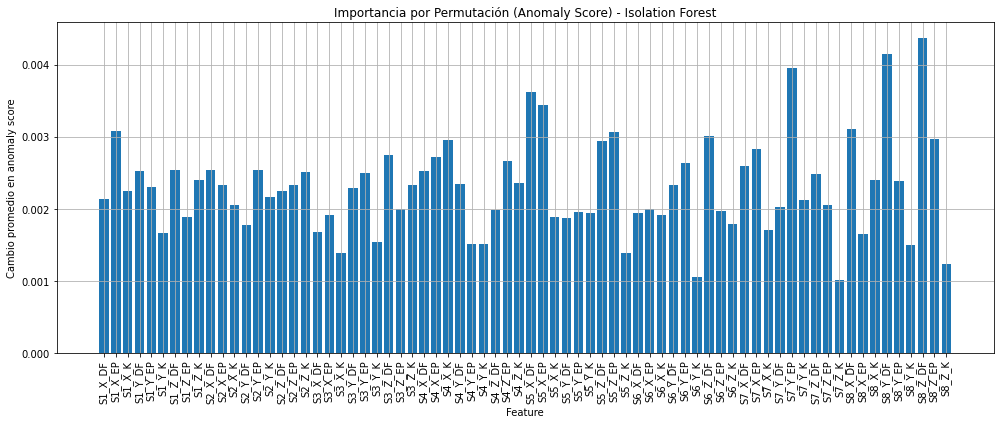

In [9]:

# Aplicación
X_array = data_health
importances = permutation_importance_anomaly(model, X_array, n_repeats=10)


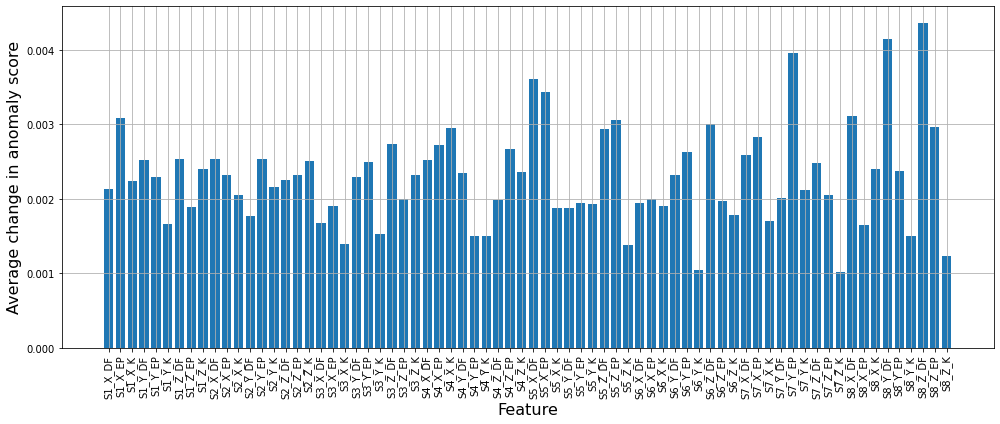

In [15]:
# Visualización
plt.figure(figsize=(14, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(ticks=range(len(importances)), labels=column_names, rotation=90)
#plt.title("Importancia por Permutación (Anomaly Score) - Isolation Forest")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Feature",fontsize=16)
plt.ylabel("Average change in anomaly score",fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()

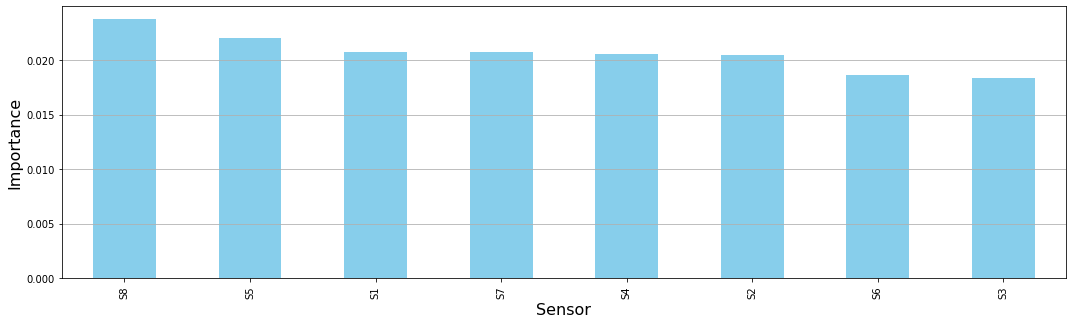

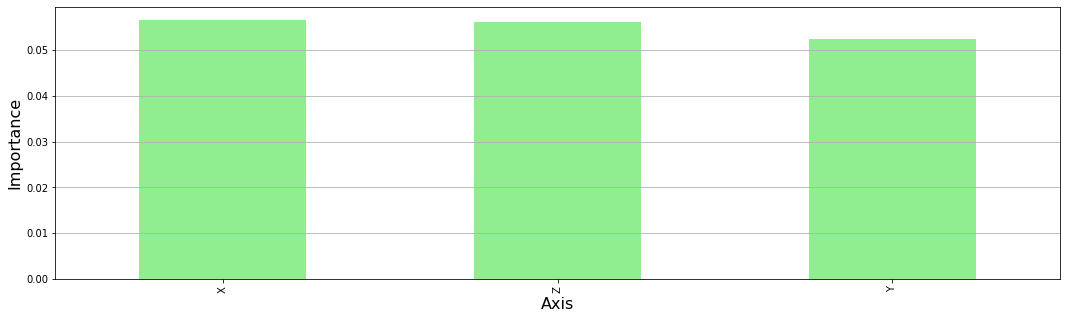

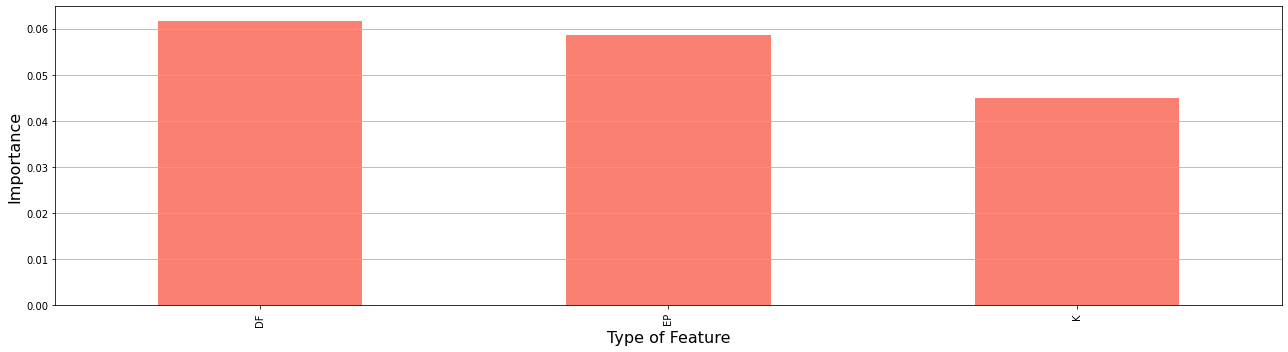

In [18]:
# Primero, crea un DataFrame para facilitar el agrupamiento
df_imp = pd.DataFrame({
    'feature': column_names,
    'importance': importances
})

# Extraer sensor, eje y tipo de feature con split y asignar columnas nuevas
df_imp['sensor'] = df_imp['feature'].apply(lambda x: x.split('_')[0])  # S1, S2, ...
df_imp['axis'] = df_imp['feature'].apply(lambda x: x.split('_')[1])    # X, Y, Z
df_imp['feat_type'] = df_imp['feature'].apply(lambda x: x.split('_')[2])  # DF, EP, K

# Agrupación por sensor
imp_sensor = df_imp.groupby('sensor')['importance'].sum().sort_values(ascending=False)

# Agrupación por eje (axis)
imp_axis = df_imp.groupby('axis')['importance'].sum().sort_values(ascending=False)

# Agrupación por tipo de feature
imp_feat_type = df_imp.groupby('feat_type')['importance'].sum().sort_values(ascending=False)

# --- Visualización ---

plt.figure(figsize=(18, 5))

# 1) Importancia por sensor
#plt.subplot(1, 3, 1)
imp_sensor.plot(kind='bar', color='skyblue')
#plt.title('Importancia por Sensor')
plt.xlabel('Sensor',fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.show()

# 2) Importancia por eje (axis)
plt.figure(figsize=(18, 5))
#plt.subplot(1, 3, 2)
imp_axis.plot(kind='bar', color='lightgreen')
#plt.title('Importancia por Eje')
plt.xlabel('Axis',fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.show()
# 3) Importancia por tipo de feature
plt.figure(figsize=(18, 5))
#plt.subplot(1, 3, 3)
imp_feat_type.plot(kind='bar', color='salmon')
#plt.title('Importancia por Tipo de Feature')
plt.xlabel('Type of Feature',fontsize=16)
plt.ylabel('Importance',fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()